# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Fuction to find the mean of a list of values:
def findMean(num_list):
    '''
    Return the mean out of any list of numbers.
        
        - Params:
        num_list: a list of numeric values
    '''    
    return round(sum(num_list)/len(num_list),2)

# Function to find th variance from a list of numbers:
def findVariance(num_list):
    '''
    Return the variance from a list of numbers.

        - Params:
        num_list: a list of numeric values
    '''
    l = []
    a = sum(num_list)/len(num_list)
    for i in num_list:
        b = i-a
        c = b**2
        l.append(c)
    d = len(l)
    e = sum(l)/d
    return round(e,2)

# Function to find the standard deviation from a list of numbers:
def findStd(num_list):
    '''
    Return the standard deviation from a list of numbers.

        - Params:
        num_list: a list of numeric values
    '''    
    l = []
    a = sum(num_list)/len(num_list)
    for i in num_list:
        b = i-a
        c = b**2
        l.append(c)
    d = len(l)
    e = sum(l)/d
    return round(e**(.5),2)

In [0]:
# Sale numbers of the past week:
sales_amounts = [3505,2400,3027,2798,3700,3250,2689]

print('Mean: ',findMean(sales_amounts))
print('Variance: ',findVariance(sales_amounts))
print('Standard Deviation: ',findStd(sales_amounts))

Mean:  3052.71
Variance:  183761.06
Standard Deviation:  428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [13]:
import numpy as np
# Sale numbers of the past week:
sales_amounts = [3505,2400,3027,2798,3700,3250,2689]
# Number of customers from the past week:
num_of_cust = [127,80,105,92,120,115,93]

# Covariance between sales and customers:
cov = round(np.cov(sales_amounts,num_of_cust)[0][1],2)
print('Covariance: ',cov)

Covariance:  7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [29]:
# Standard deviation of the number of customers that entered the store in the past week:
cust_std = findStd(num_of_cust)
# Standard deviation of the sales from the past week:
sales_std = findStd(sales_amounts)
# Find the covariance:
cov = np.cov(np.array([sales_amounts],[num_of_cust])
# Denominator for covariance standardization:
denominator = sales_std*cust_std
# Standardize the covariance to find the correlation coefficient:
corr = cov/denominator
print('By hand Correlation Coeficient: \n',corr)

print('Correlation Coef. useing Numpy: ',np.corrcoef(sales_amounts,num_of_cust)[0][1])

# Find the Correlation Coefficient using pandas:
import pandas as pd
# Create a dataframe:
df = pd.DataFrame({'sales':sales_amounts,'customers':num_of_cust})
# Find the correlation coefficient:
df['sales'].corr(df['customers'])
print('Correlation Coef. using Pandas: ',np.array(df.corr())[0][1])

np.linalg.det(corr)

By hand Correlation Coeficient: 
 [[31.67342724  1.12345915]
 [ 1.12345915  0.04298498]]
Correlation Coef. useing Numpy:  0.9628339778148909
Correlation Coef. using Pandas:  0.9628339778148908


0.09932107295422878

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

Variance-CoVariance Matrix:


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613




 Correlation Matrix:


,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


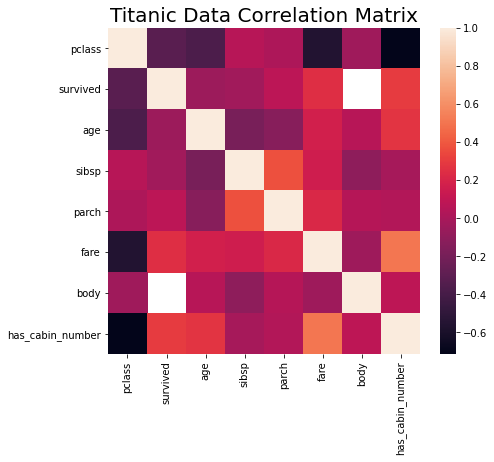

In [0]:
import pandas as pd
# Read in the cleaned up titanic dataset:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col='Unnamed: 0')
# Get the variance-covariance matrix:
cov = titanic.cov()
# Get the correlation matrix:
corr = titanic.corr()

print("Variance-CoVariance Matrix:")
display(cov)
print('\n\n',"Correlation Matrix:")
display(corr)
print('\n\n')

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr)
ax.set_title('Titanic Data Correlation Matrix',fontsize=20)
plt.show();


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

**Answer:**
> A synonym for orthogonal is perpendicular.

0

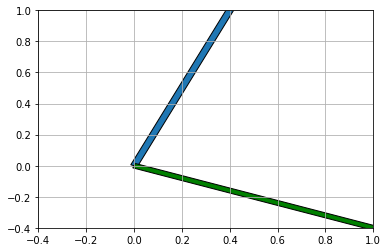

In [33]:
# Creat orthogonal vectors:
vec_a = [.2,.5]
vec_b = [.5,-.2]

# Plot the orthogonal vectors:
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-.4,1.0)
plt.ylim(-.4,1.0)
plt.arrow(0,0,vec_a[0],vec_a[1],
          width=.03,head_width=.1,head_length=.1,length_includes_head=True)
plt.arrow(0,0,vec_b[0],vec_b[1],
          width=.03,head_width=.1,head_length=.1,length_includes_head=True,
          color='green',ec='k');

np.dot(vec_a,vec_b)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

**Answer:**
> These vectors are not orthogonal, because the are not perpendicular and the dot product is not equal to zero.

-0.4


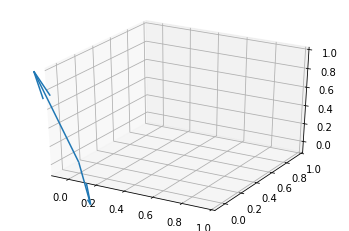

In [31]:
# Create vectors:
vec_c,vec_d = [-.5,.3,.7],[.6,-.8,.2]

# Check orthoganality by finding the dot product of the 2 vectors:
print(np.dot(vec_c,vec_d))

# Check orthoganality by plotting these vectors:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-.10,1)
ax.set_ylim(-.10,1)
ax.set_zlim(-.10,1)
ax.quiver(0,0,0,vec_c[0],vec_c[1],vec_c[2])
ax.quiver(0,0,0,vec_d[0],vec_d[1],vec_d[2])

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# Create vector:
c = [2,-15,6,20]

# Find the length of the vector:
norm_c = np.linalg.norm(c)**2
# Find the dot product of the vector:
dot_c = np.dot(c,c)
# Calculate the vector.Transpose by itself:
transpose_c = np.array(c).T*np.array(c)

print(norm_c)
print(dot_c)
print(sum(transpose_c))

# All of these calculations compute the same thing.

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**Answer:**
>$d = 7\hat{i}+12\hat{j}$ 

>$e = 2\hat{i}+11\hat{j}+-8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# Create Vector:
f = [4,12,11,9,2]
# Convert f into a numpy array:
f = np.array(f)
# Turn vector into a unit vector
f = f/np.linalg.norm(f)
f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Rank  1
Rank  2


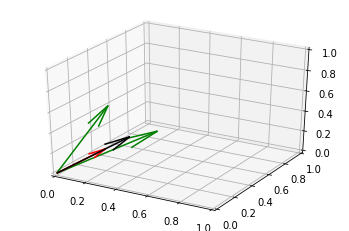

In [3]:
import numpy as np
import pandas as pd
# Create matrix of linearly dependent vectors:
dep_vec_matrix = pd.DataFrame({'vec_a':[.2,.2,.2],'vec_b':[.3,.3,.3]})
print('Rank ',np.linalg.matrix_rank(dep_vec_matrix))
# Create matrix of linearly independent vectors:
ind_vec_matrix = pd.DataFrame({'vec_a':[.3,.6,.2],'vec_b':[.1,.4,.5]})
print('Rank ',np.linalg.matrix_rank(ind_vec_matrix))
# Plot vectors:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.quiver(0,0,0,dep_vec_matrix['vec_a'][0],dep_vec_matrix['vec_a'][1],dep_vec_matrix['vec_a'][2],color='red')
ax.quiver(0,0,0,dep_vec_matrix['vec_b'][0],dep_vec_matrix['vec_b'][1],dep_vec_matrix['vec_b'][2],color='black')
ax.quiver(0,0,0,ind_vec_matrix['vec_a'][0],ind_vec_matrix['vec_a'][1],ind_vec_matrix['vec_a'][2],color='green')
ax.quiver(0,0,0,ind_vec_matrix['vec_b'][0],ind_vec_matrix['vec_b'][1],ind_vec_matrix['vec_b'][2],color='green');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Span: Rank  1 




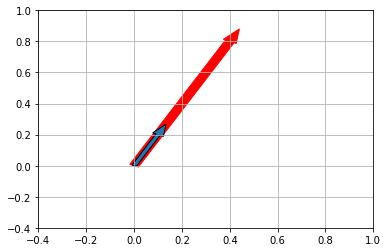

In [0]:
# Create vectors:
g = np.array([.1,.2])
h = np.array([.4,.8])

# Find the span:
print('Span: Rank ',np.linalg.matrix_rank([g,h]),'\n\n')

# Plot the span of the vectors to show its 1-d:
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-.4,1)
plt.ylim(-.4,1)
plt.arrow(0,0,h[0],h[1],color='red',head_width=.06,width=.04)
plt.arrow(0,0,g[0],g[1],head_width=.05,width=.02);

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# Create Vectors:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
# Find span of vectors:
print('Span: Rank',np.linalg.matrix_rank([l,m,n]))

Span: Rank 3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



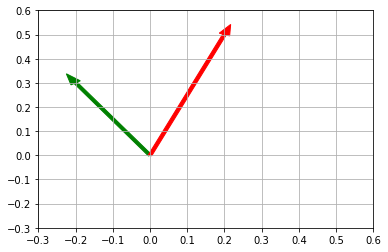

In [0]:
# Creat vectors:
vec_one,vec_two = [-.2,.3],[.2,.5]

# Plot vectors that form a basis for rank2:
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-.3,.6)
plt.ylim(-.3,.6)
plt.arrow(0,0,vec_one[0],vec_one[1],
          head_width=.03, width=.01, color='green')
plt.arrow(0,0,vec_two[0],vec_two[1],
          head_width=.03, width=.01, color='red')

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# Create matrix:
p = np.array([[1,-1,4],
             [2,0,8],
             [3,7,2]])
# Find Rank:
np.linalg.matrix_rank(p.T)

3

## 7.2 What does the rank of a matrix tell us?

**Answer:**
>It shows us the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

v_w = np.dot(v,w)
w_w = np.dot(w,w)

frac = v_w/w_w

projection = np.multiply(frac,w)

fig, ax = plt.subplots()
ax.grid()
plt.xlim(-2,10)
plt.ylim(-2,10)
ax.arrow(0,0,projection[0],projection[1])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

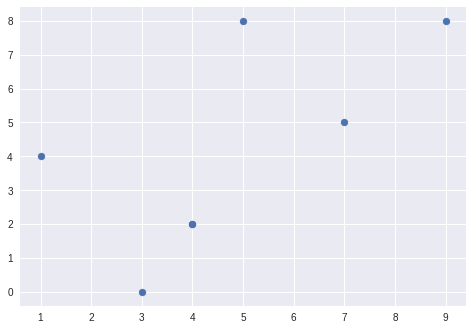

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()